## **Notebook Content**

In this notebook the following tasks are performed :  


*   Data Loading and Exploration
*   Data Cleaning
*   Dataset Building : Labeling and Structuring the Dataset
*   Dataset Building : Train-Validation Data Split
*   Dataset Building : Transfer of processed/built dataset to Train and Val Directories

For information on the Project's Proposal, Significance and Motivation please refer to the [README
](https://github.com/Moyo-tech/DermDetect-AI/blob/main/README.md#introduction-and-background)




## **Loading Libaries Dataset**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [ ]:
# MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/My Drive/skincancer

Mounted at /content/drive
/content/drive/My Drive/skincancer


In [ ]:
import cv2

# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = './datasets/HAM10000_images_part_2/ISIC_0034320.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Get the height and width of the image
height, width = image.shape[:2]

# Print the image size
print("Image Size - Width:", width, "Height:", height)


Image Size - Width: 600 Height: 450


## **Understanding and Cleaning the RAW Dataset**

In this project, I combined two datasets to train and evaluate a skin cancer classification model you can also refer to the [**README**](https://github.com/Moyo-tech/DermDetect-AI/blob/main/README.md#the-datasets-used) for more deatils on them:

**Skin Cancer MNIST: HAM10000**

*  Diverse collection of 10,015 dermatoscopic images.
*  Represents important diagnostic categories, including various skin lesions.
*  Ground truth provided through histopathology, follow-up examination, expert consensus, or confocal microscopy.

**ISIC 2018 Challenge Training Set (Task 3)**

The second dataset used in this project is the training set for the ISIC 2018 challenge, specifically Task 3. This dataset complements the HAM10000 dataset, contributing additional images for training the skin cancer classification model

The images were renamed and stored in these folders :
*  HAM10000_images_part1 (5000 JPEG files) Representing the Skin Cancer M.N.I.S.T.: HAM10000

*  HAM10000_images_part2 (5015 JPEG files) Representing the ISIC 2018 Challenge Training Set


Combining these datasets provides a comprehensive and diverse training set, enhancing the model's ability to generalize and accurately classify different types of skin lesions. For more details please refer to the [**README**](https://github.com/Moyo-tech/DermDetect-AI/blob/main/README.md#the-datasets-used)

In [ ]:
# Define the base directory for the dataset
base_skin_dir = 'datasets'

# Create a dictionary that maps image filenames (without extension) to their full paths
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

# Dictionary for mapping lesion types to more human-friendly labels
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
# Read metadata CSV file into a DataFrame
df_skin = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

# Create new columns in the DataFrame for better readability
df_skin['path'] = df_skin['image_id'].map(imageid_path_dict.get)  # Map image paths to DataFrame
df_skin['cell_type'] = df_skin['dx'].map(lesion_type_dict.get)  # Map lesion types to human-friendly labels
df_skin['cell_type_idx'] = pd.Categorical(df_skin['cell_type']).codes  # Convert lesion types to categorical codes for better handling

# Display the first few rows of the DataFrame to check the newly added columns
df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_2/ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,datasets/HAM10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2


In [ ]:
df_skin.shape

(10015, 10)

In [ ]:
df_skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      10015 non-null  object 
 1   image_id       10015 non-null  object 
 2   dx             10015 non-null  object 
 3   dx_type        10015 non-null  object 
 4   age            9958 non-null   float64
 5   sex            10015 non-null  object 
 6   localization   10015 non-null  object 
 7   path           10015 non-null  object 
 8   cell_type      10015 non-null  object 
 9   cell_type_idx  10015 non-null  int8   
dtypes: float64(1), int8(1), object(8)
memory usage: 714.1+ KB


## **Cleaning the Dataset**


### Handling Missing Values

In [ ]:
print('HAM10000  missing values')

# Display a DataFrame showing the count of null values for each column
display(pd.DataFrame(df_skin.isnull().sum(), columns=['Null count']))

HAM10000  missing values


,Null count
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
sex,0
localization,0
path,0
cell_type,0
cell_type_idx,0


As we can see the columns "age," have missing values that need to be addressed during the preprocessing stage.

In [ ]:
# Handle the Column age missing values
df_skin['age'].fillna((df_skin['age'].mean()), inplace=True)

# Recheck for missing values again
display(pd.DataFrame(df_skin.isnull().sum(), columns=['Null count']))

,Null count
lesion_id,0
image_id,0
dx,0
dx_type,0
age,0
sex,0
localization,0
path,0
cell_type,0
cell_type_idx,0


### Handling Duplicates of images

In [ ]:
# This will tell us how many images are associated with each lesion_id
df = df_skin.groupby('lesion_id').count()

# Now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

# Reset the index to make 'lesion_id' a regular column
df.reset_index(inplace=True)

# Display the first few rows of the DataFrame after filtering
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000001,1,1,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1,1,1


In [ ]:
# Function to identify lesion_id's with duplicate or unique images
def identify_duplicates(x):
    unique_list = list(df['lesion_id'])
    return 'no_duplicates' if x in unique_list else 'has_duplicates'

# Create a new column 'duplicates' as a copy of the 'lesion_id' column
df_skin['duplicates'] = df_skin['lesion_id']

# Apply the 'identify_duplicates' function to the 'duplicates' column
df_skin['duplicates'] = df_skin['duplicates'].apply(identify_duplicates)

# Display the first few rows of the DataFrame with the new 'duplicates' column
df_skin.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_2/ISIC_0027419.jpg,Benign keratosis-like lesions,2,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,datasets/HAM10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,datasets/HAM10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2,has_duplicates


In [ ]:
df_skin.shape

(10015, 11)

In [ ]:
# Count occurrences of each value in the 'duplicates' column of the 'df_skin' DataFrame
df_skin['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [ ]:
# Filter out images that don't have duplicates in the 'duplicates' column
df_clean = df_skin[df_skin['duplicates'] == 'no_duplicates']

df_clean.shape

(5514, 11)

### Testing Denoising of Images

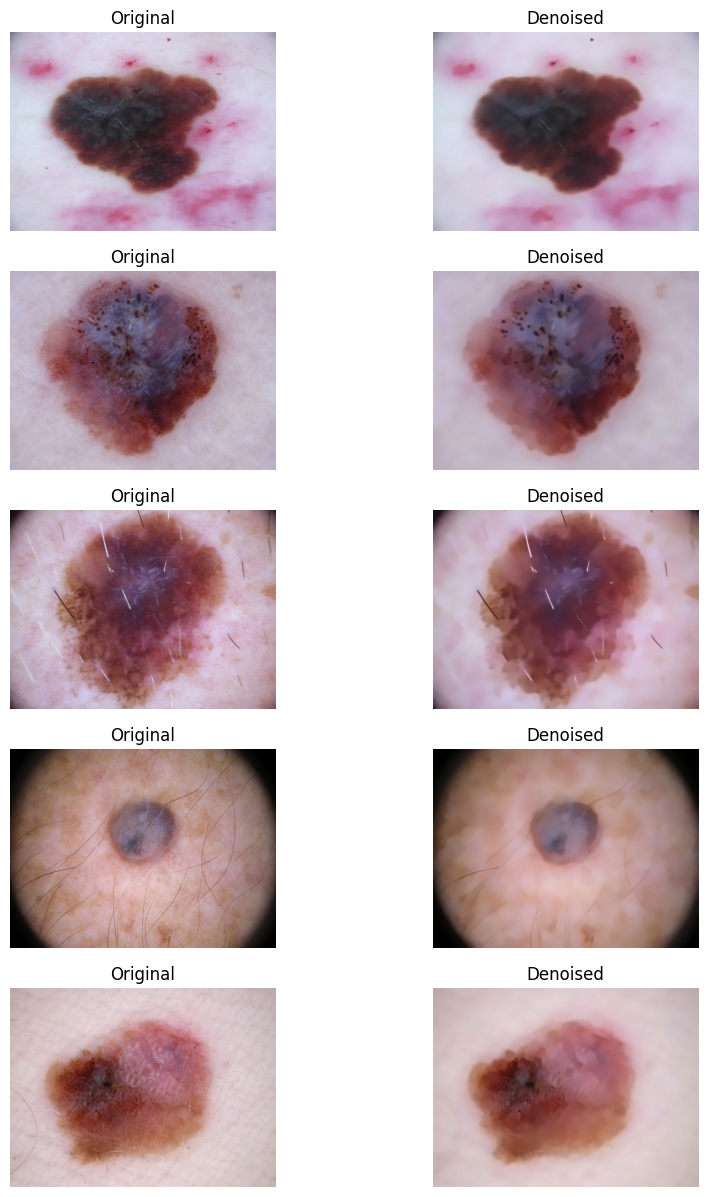

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image_path = './datasets/HAM10000_images_part_2/'


def non_local_means_denoising(image):
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised_image

# Assuming random_images is a list of 5 image filenames
random_images = ['ISIC_0034233.jpg', 'ISIC_0034239.jpg', 'ISIC_0034253.jpg', 'ISIC_0034188.jpg', 'ISIC_0034159.jpg']

# Set up subplots for original and denoised images
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

for i, image_filename in enumerate(random_images):
    # Load the original image
    original_image = cv2.imread(os.path.join(image_path, image_filename))
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Load and denoise the image
    denoised_image = non_local_means_denoising(original_image)

    # Plot the original image
    axs[i, 0].imshow(original_image)
    axs[i, 0].axis('off')
    axs[i, 0].set_title('Original')

    # Plot the denoised image
    axs[i, 1].imshow(denoised_image)
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Denoised')

plt.show()



**Explanation**:

In the generated output, we are comparing original images with their denoised counterparts using non-local means denoising. However, upon visual inspection of the generated images, it becomes apparent that the denoised versions may lose certain characteristics and features present in the original images.

Given this observation, **it is recommended to stick with the original**, non-denoised images. The denoising process, while reducing noise, might inadvertently remove important details that could be crucial for our model. This decision aims to preserve the distinctive features in the images, ensuring that the model receives the most informative input for accurate learning and predictions.

## **Building of Datasets for Model**

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Create Directories
base_dir = 'processed_image'
os.mkdir(base_dir)

# Subdirectories for training and validation
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

In [ ]:
# Step 2: Create Class Directories Inside Train and Val
def create_class_directories(base_path):
    classes = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']
    for class_name in classes:
        class_path = os.path.join(base_path, class_name)
        os.mkdir(class_path)

# Create class directories inside train_dir and val_dir
create_class_directories(train_dir)
create_class_directories(val_dir)


In [ ]:
# Step 3: Split Data into Train and Val Sets
def split_data_for_val(df_data):

  # Define the target variable 'y' as 'cell_type' from the cleaned DataFrame
    y = df_clean['cell_type']

    # Use train_test_split to create a validation set ('df_val') with 17% of the data, stratified based on 'y'
    _, df_val = train_test_split(df_data, test_size=0.17, random_state=101, stratify=y)
    return  df_val

#Call the function
df_val = split_data_for_val(df_clean)
print(len(df_val))

938


In [ ]:
# Step 4: Assign Train or Val Labels to Data
def split_data_for_train(x):
    # Create a list of all the 'image_id's in the validation set ('df_val')
    val_list = list(df_val['image_id'])

    # Check if the current 'image_id' is in the validation set
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# Create a new column 'train_or_val' in the 'df_skin' DataFrame using the 'image_id'
df_skin['train_or_val'] = df_skin['image_id']

# Apply the 'split_data_for_train' function to assign 'train' or 'val' to each image
df_skin['train_or_val'] = df_skin['train_or_val'].apply(split_data_for_train)

# Create a DataFrame 'df_train' containing only images in the training set
df_train = df_skin[df_skin['train_or_val'] == 'train']

print(len(df_train))

9077


In [ ]:
# Set the 'image_id' column as the index in the 'df_skin' DataFrame
df_skin.set_index('image_id', inplace=True)

In [ ]:
# Step 5: Transfer Images to Train and Val Directories

# Get a list of images in each of the two folders to combine the datasets together
folder_1 = os.listdir('./datasets/HAM10000_images_part_1')
folder_2 = os.listdir('./datasets/HAM10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])


# Transfer the train images
for image in train_list:

    fname = image + '.jpg'
    label = df_skin.loc[image,'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('./datasets/HAM10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('./datasets/HAM10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the val images
for image in val_list:

    fname = image + '.jpg'
    label = df_skin.loc[image,'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('./datasets/HAM10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('./datasets/HAM10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


In [ ]:
train_dir = './processed_datasets/train_dir'
val_dir = './processed_datasets/val_dir'

In [ ]:
# Check the number of train images
def check_num_images_in_folders(base_folder, classes):
    for img_class in classes:
        # Form the path to the specific class folder
        class_folder = os.path.join(base_folder, img_class)
        print(f"Number of images in {class_folder}: {len(os.listdir(class_folder))}")

# Call the function to check the number of train images for each skin lesion class
check_num_images_in_folders(train_dir, ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df'])
print('\n')

# Call the function to check the number of validation images for each skin lesion class
check_num_images_in_folders(val_dir, ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df'])

In [ ]:
df_train.head()

In [ ]:
# Save the training and validation DataFrames to CSV files in case of needed use
save_path = "./processed_datasets/"

df_train.to_csv(save_path + 'traincsv.csv', header=True, index=False)
df_val.to_csv(save_path + 'validcsv.csv', header=True, index=False)